<a href="https://colab.research.google.com/github/ladiff777/Computer-Vision_7th-sem/blob/main/exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

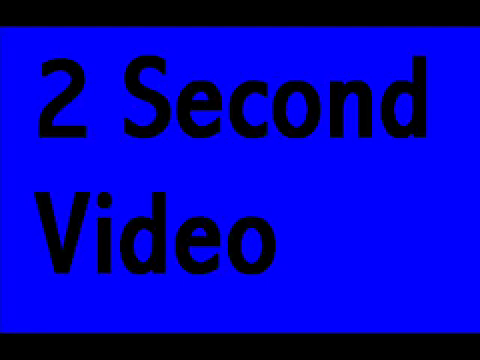

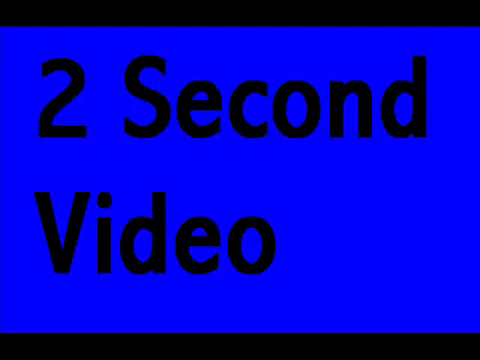

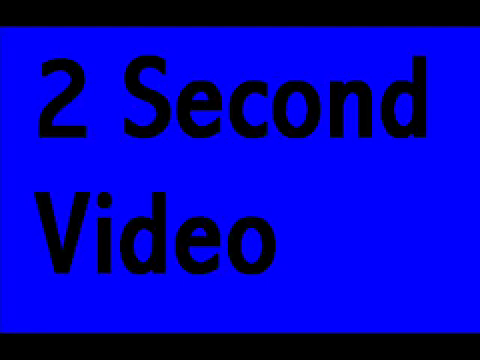

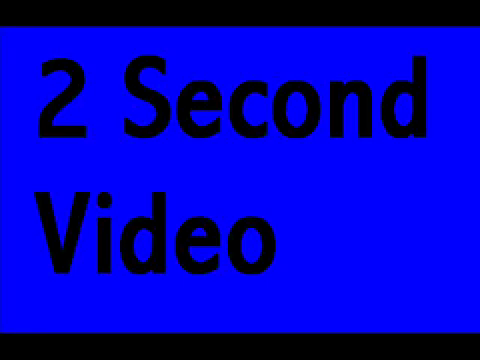

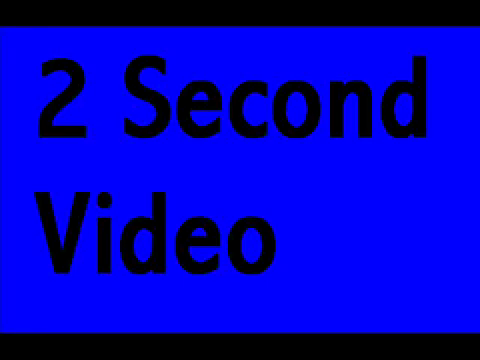

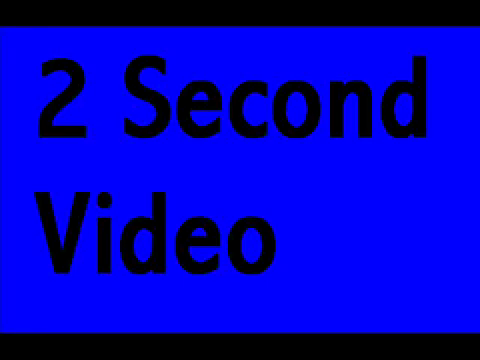

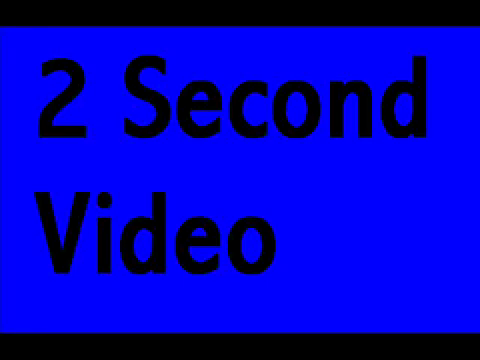

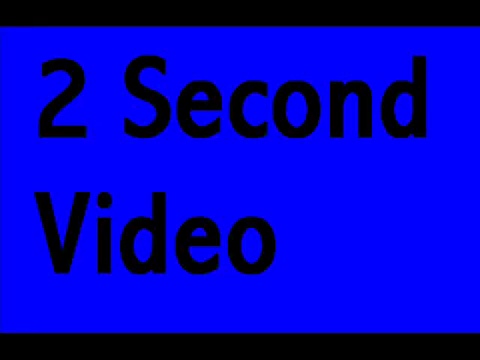

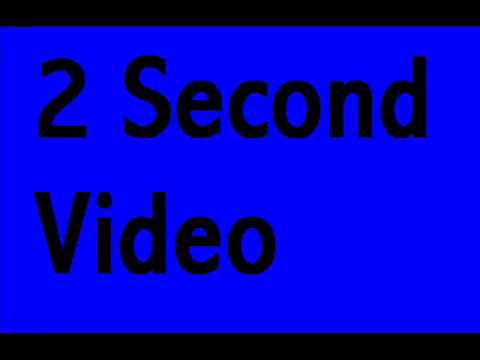

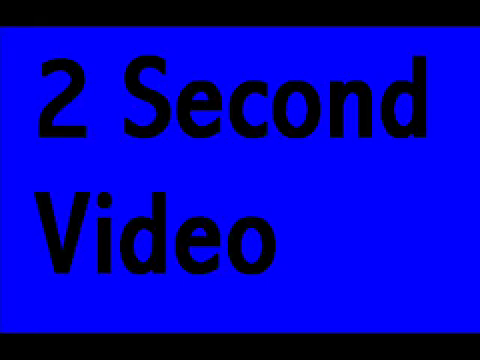

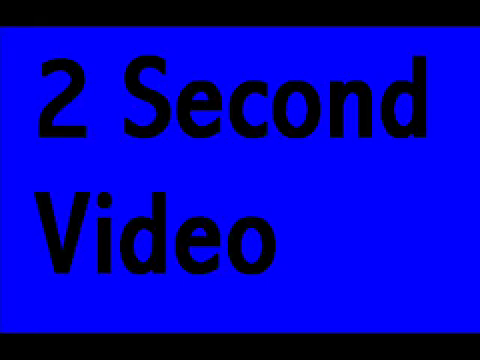

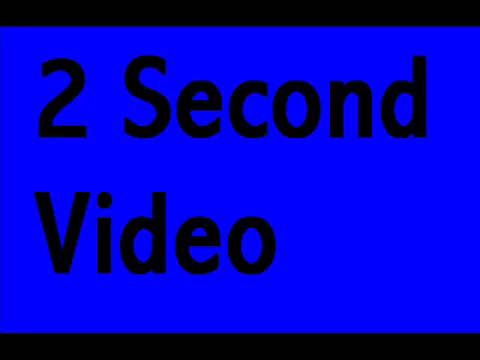

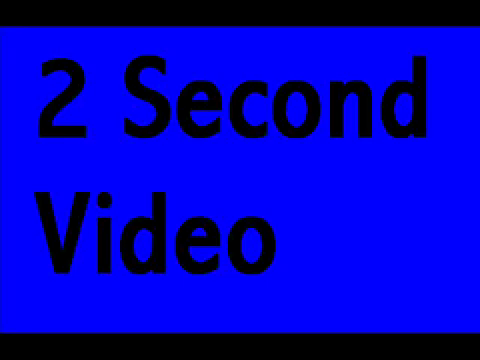

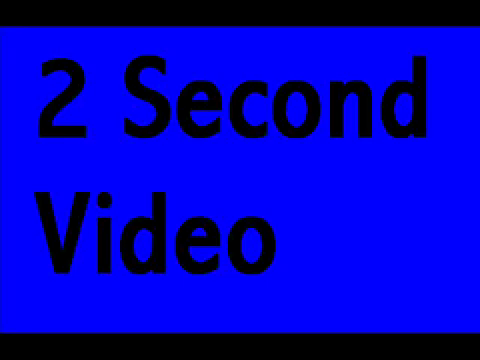

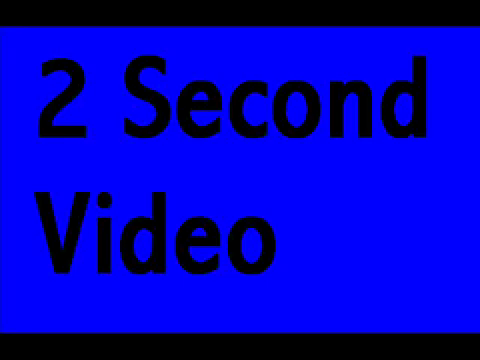

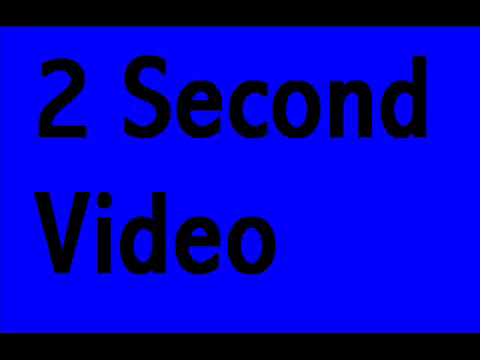

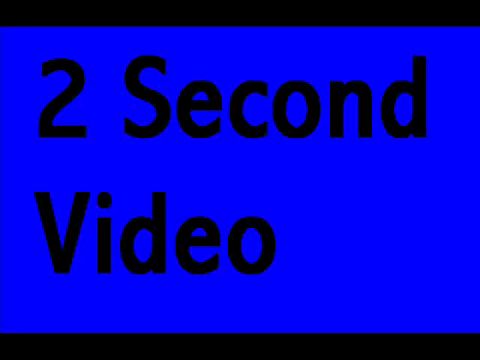

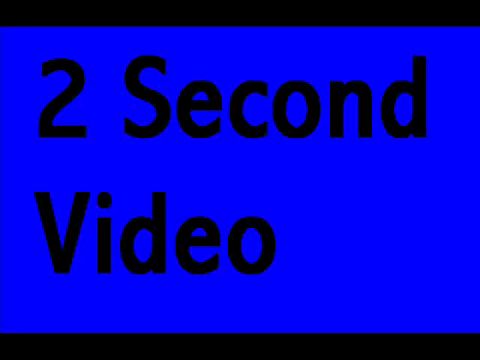

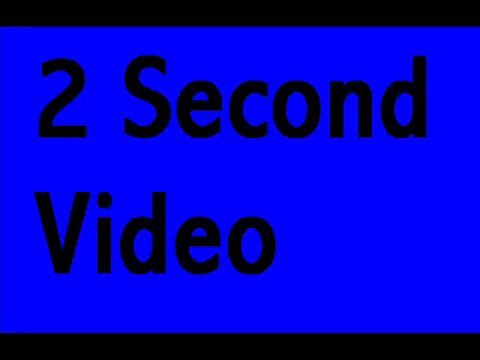

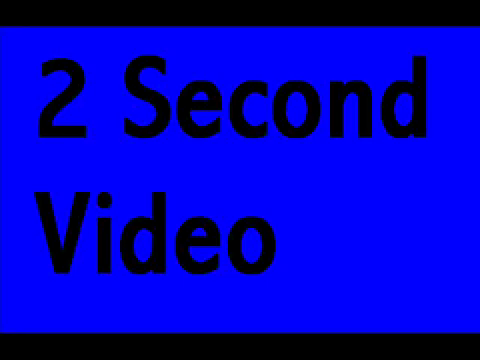

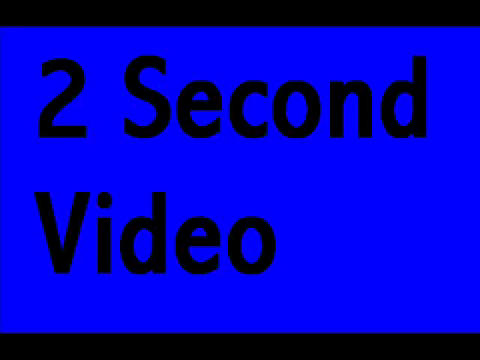

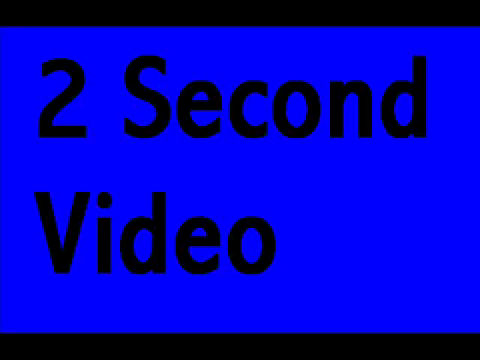

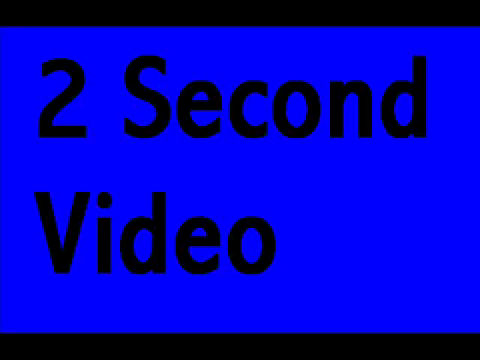

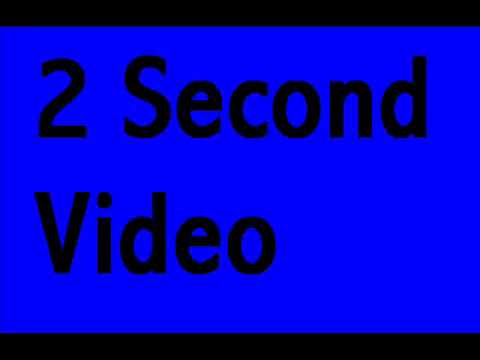

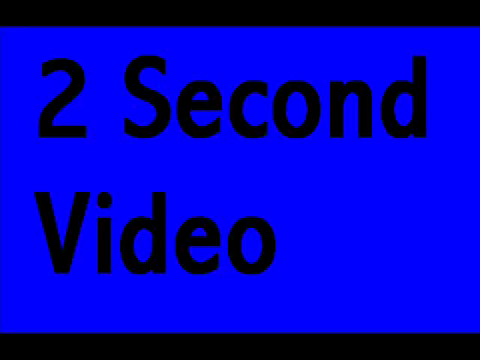

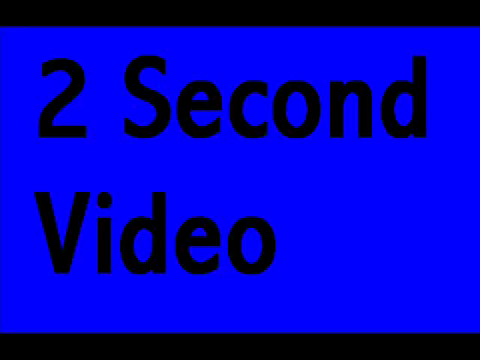

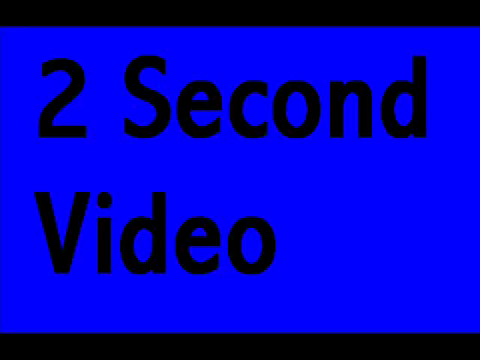

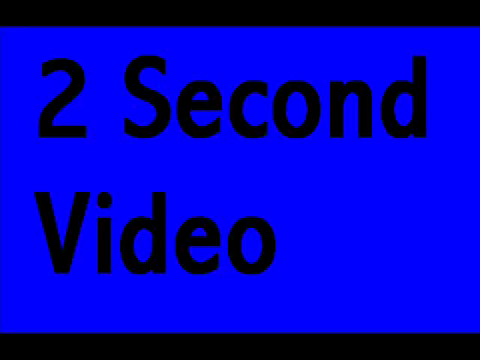

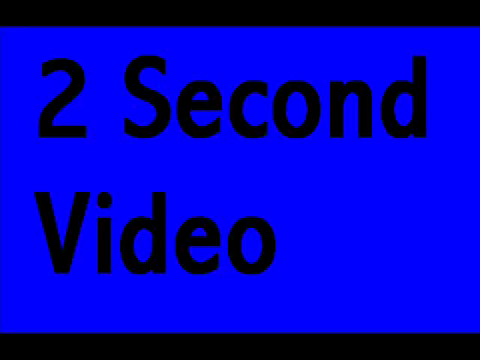

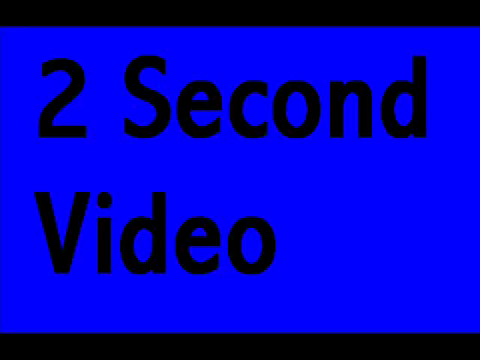

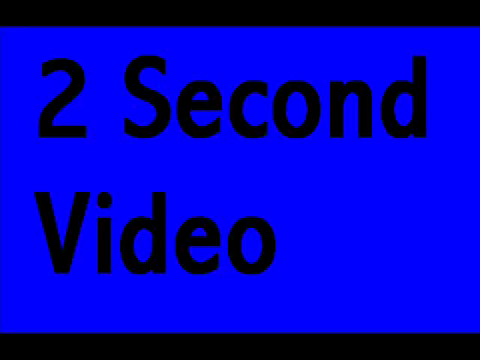

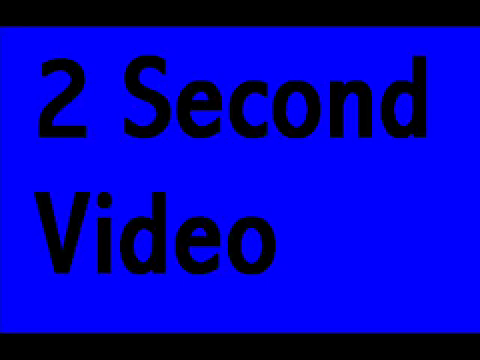

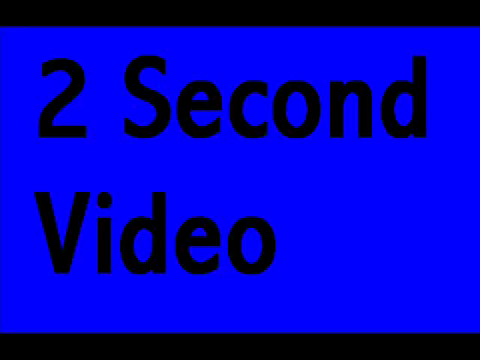

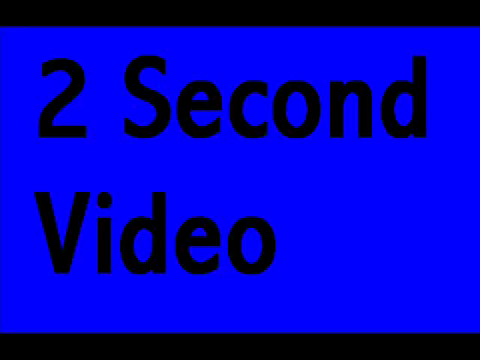

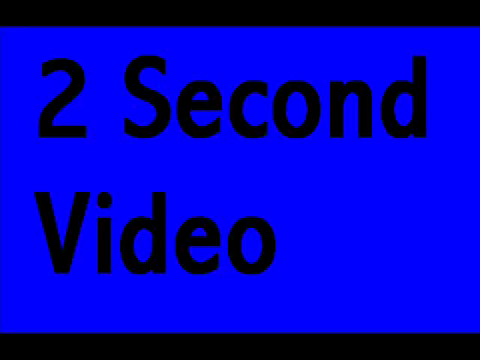

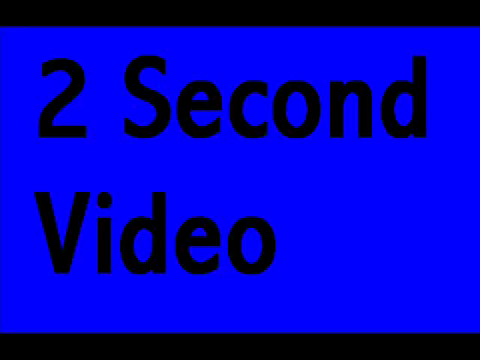

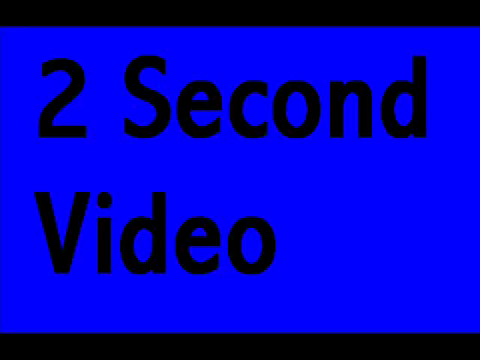

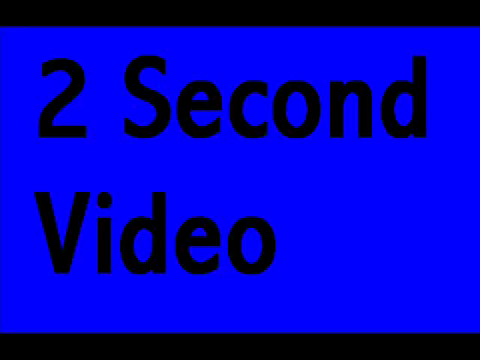

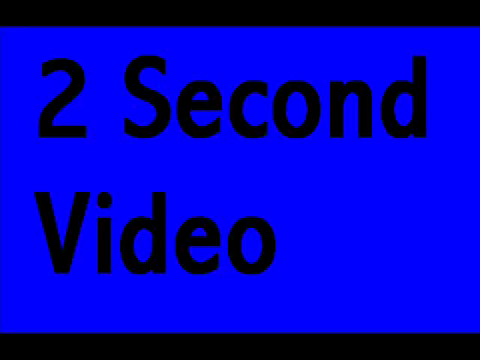

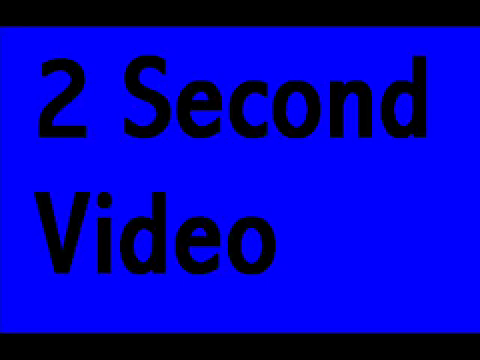

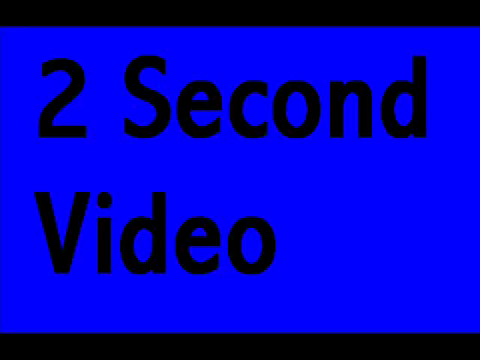

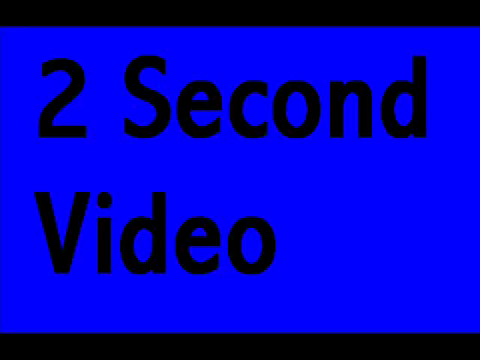

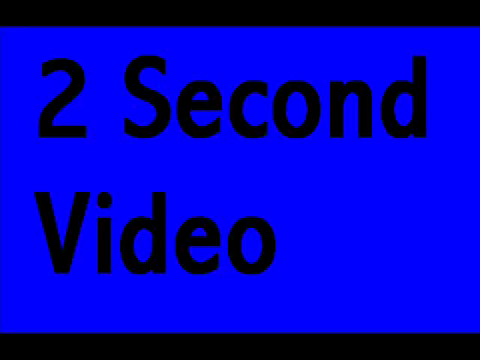

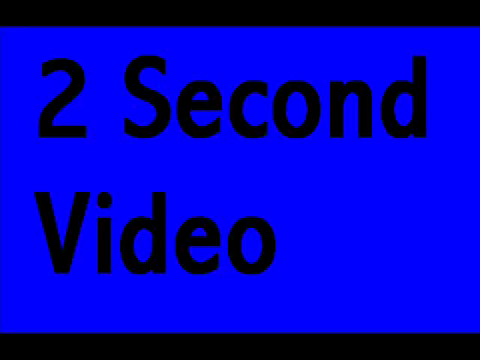

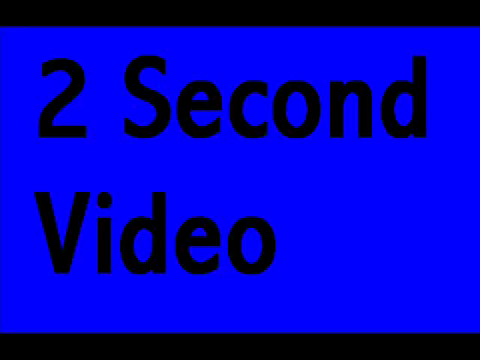

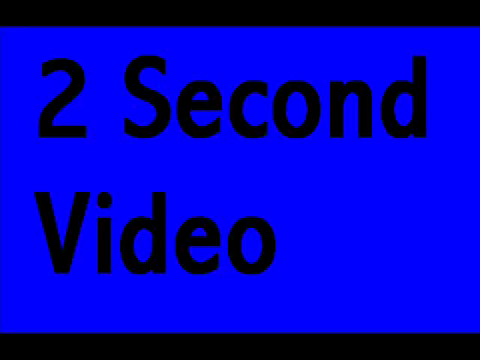

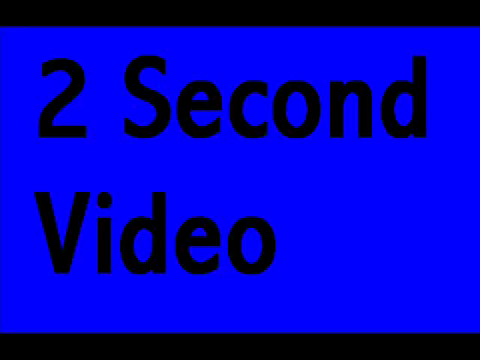

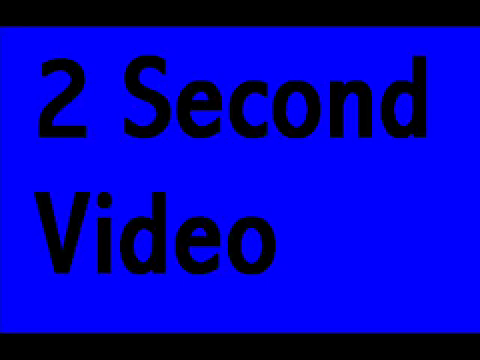

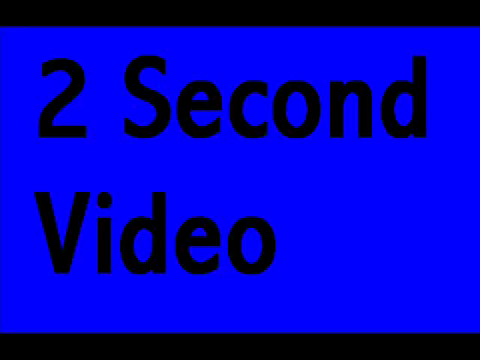

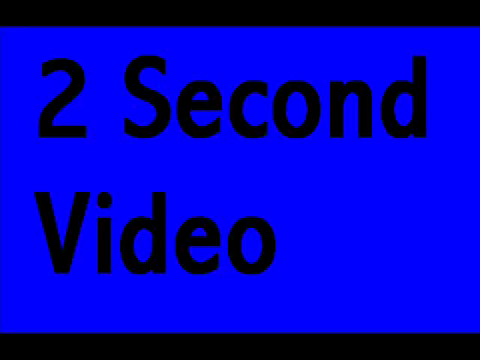

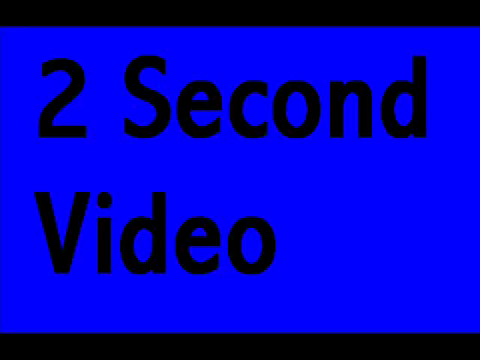

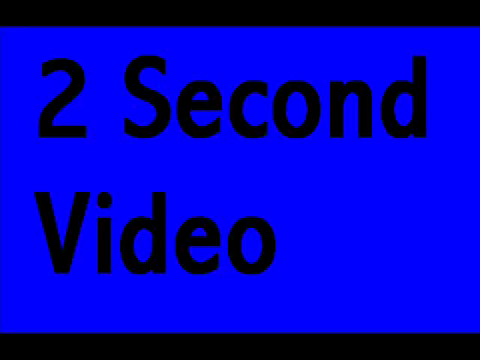

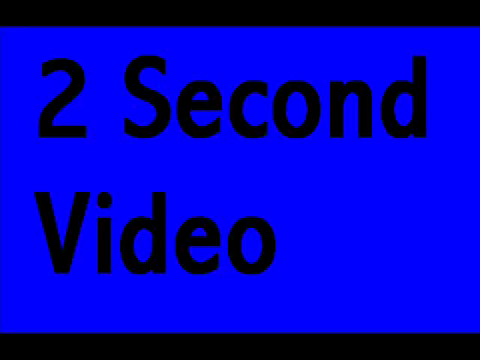

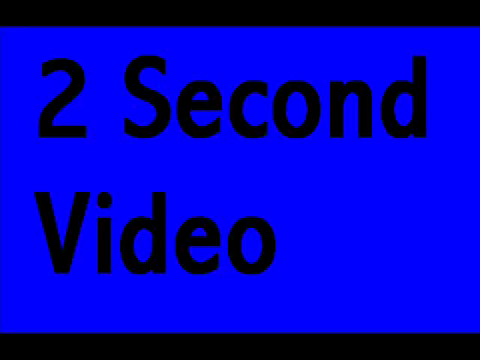

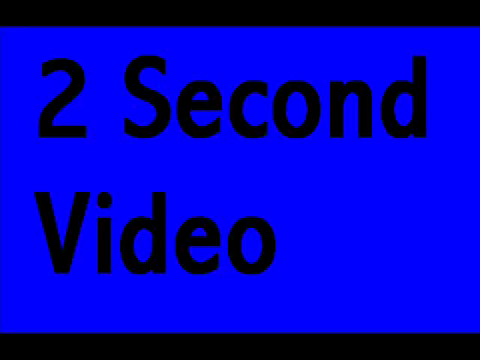

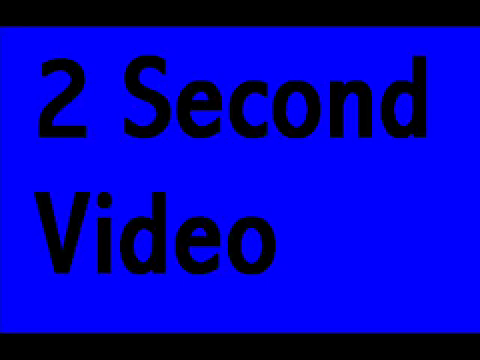

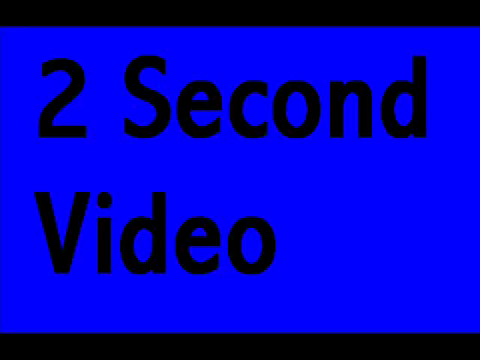

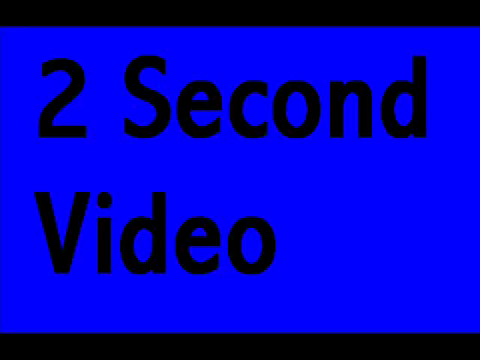

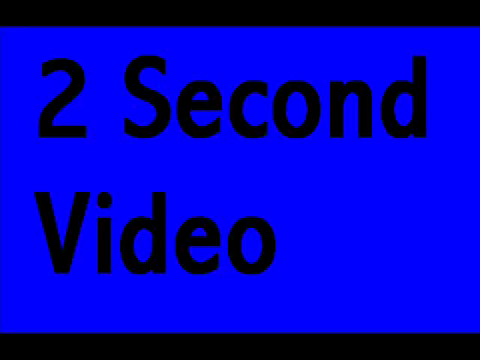

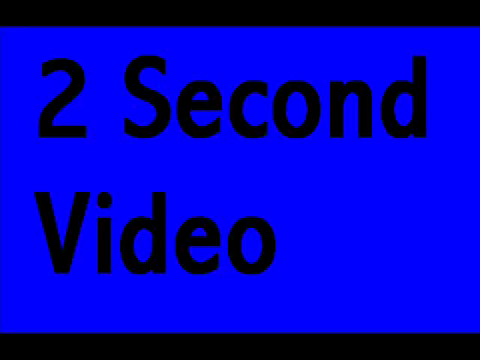

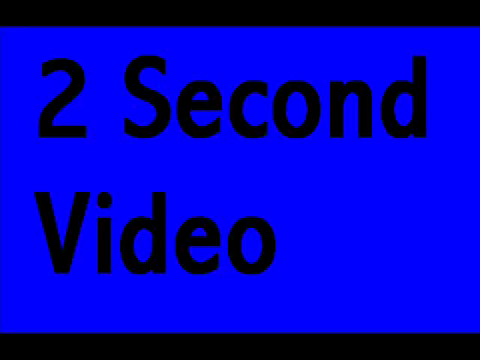

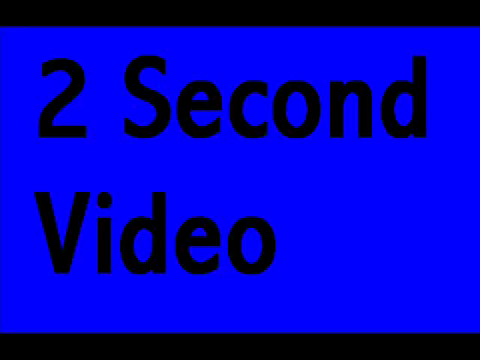

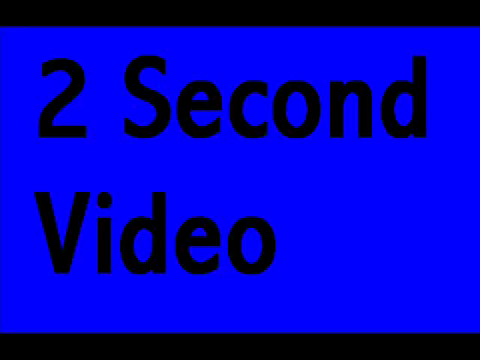

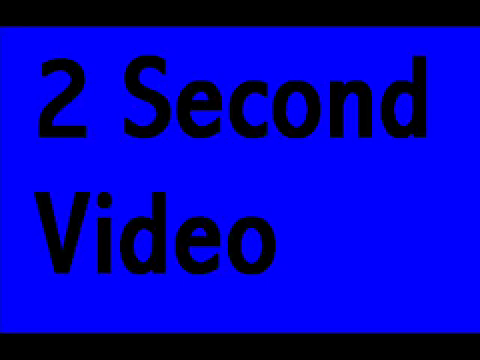

In [9]:
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images
import cv2
import numpy as np

# Initialize the video capture
cap = cv2.VideoCapture('/ym.mp4')  # Replace 'your_video.mp4' with the video file path

# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Initialize object points and initial location
object_points = np.array([[100, 100]], dtype=np.float32)
color = np.random.randint(0, 255, (100, 3))
old_frame = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if old_frame is None:
        old_frame = gray
        continue

    # Calculate optical flow
    new_object_points, st, err = cv2.calcOpticalFlowPyrLK(old_frame, gray, object_points, None, **lk_params)

    if st is not None:
        # Ensure st is a 1D boolean array
        st = st.reshape(-1)

        # Filter valid points
        good_new = new_object_points[st == 1]
        good_old = object_points[st == 1]

        # Update object points for the next frame
        object_points = good_new.reshape(-1, 1, 2)

        # Draw tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            frame = cv2.line(frame, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)

    cv2_imshow(frame)  # Use cv2_imshow to display the frame

    if cv2.waitKey(30) & 0xFF == 27:
        break

    old_frame = gray

cap.release()
cv2.destroyAllWindows()
